In [110]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [111]:
df = pd.read_csv('train.csv', usecols = ['Age', 'Fare', 'Survived'])

In [112]:
X = df.drop(columns = ['Survived'])
y = df['Survived']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [114]:
X_train.shape

(712, 2)

In [115]:
X_train['Age'].isnull().sum()

148

In [116]:
X_test['Age'].isnull().sum()

29

In [117]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

In [118]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\269996212.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).va

In [119]:
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\1030723902.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).valu

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\2315829164.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label = 'Original', hist = False)
C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\2315829164.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  s

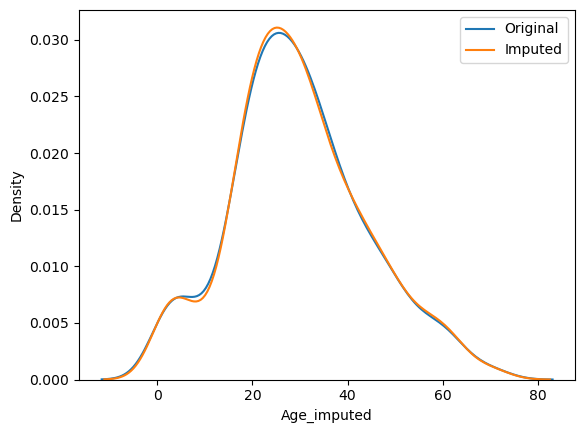

In [120]:
sns.distplot(X_train['Age'], label = 'Original', hist = False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist = False)

plt.legend()
plt.show()

In [121]:
print('Original variable variance', X_train['Age'].var())
print('Variance after imputed value', X_train['Age_imputed'].var())

Original variable variance 204.3495133904614
Variance after imputed value 204.3717073292486


In [122]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,47.366872
Age,71.512440,204.349513,204.349513
Age_imputed,47.366872,204.349513,204.371707


<Axes: >

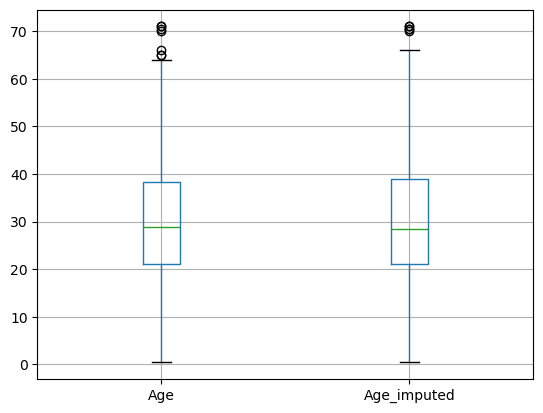

In [123]:
X_train[['Age', 'Age_imputed']].boxplot()

In [124]:
## sampled_value = X_train['Age'].dropna().sample(1, random_state = int(observation['Fare']))

In [125]:
data = pd.read_csv('house-train.csv', usecols = ['GarageQual', 'FireplaceQu', 'SalePrice'])

In [126]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [127]:
data['FireplaceQu_imputed'] = data['FireplaceQu']
data['GarageQual_imputed'] = data['GarageQual']

In [128]:
data.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
0,NaN,TA,208500,NaN,TA
1,TA,TA,181500,TA,TA
2,TA,TA,223500,TA,TA
3,Gd,TA,140000,Gd,TA
4,TA,TA,250000,TA,TA


In [129]:
data.drop(columns = ['FireplaceQu_imputed', 'GarageQual_imputed'], inplace = True)

In [130]:
data

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [160]:
X = data
y = data['SalePrice']

In [161]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [162]:
X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

In [163]:
X_train.head()

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,NaN,TA
504,Fa,TA,147000,Fa,TA
1413,Gd,TA,257000,Gd,TA
1389,Gd,TA,131000,Gd,TA


In [164]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual_imputed'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\58976576.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['Gara

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

In [165]:
temp = pd.concat(
    [
        X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
        X_train['GarageQual_imputed'].value_counts() / len(X_train)
    ],
axis = 1)

temp.columns = ['Original', 'Imputed']

In [166]:
temp

,Original,Imputed
TA,0.951043,0.951199
Fa,0.037171,0.037671
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [167]:
temp = pd.concat(
    [
        X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
        X_train['FireplaceQu_imputed'].value_counts() / len(X_train)
    ],
axis = 1)


temp.columns = ['Original', 'Imputed']

temp

,Original,Imputed
Gd,0.494272,0.258562
TA,0.412439,0.215753
Fa,0.040917,0.021404
Po,0.027823,0.014555
Ex,0.024550,0.012842


C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\1827688635.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de4

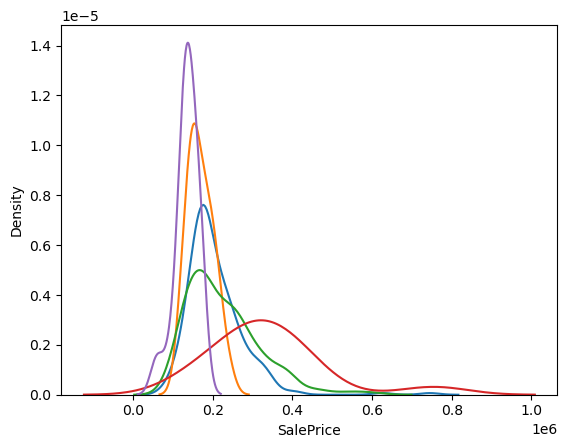

In [168]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [169]:
X_train

,FireplaceQu,GarageQual,SalePrice,FireplaceQu_imputed,GarageQual_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,NaN,TA
504,Fa,TA,147000,Fa,TA
1413,Gd,TA,257000,Gd,TA
1389,Gd,TA,131000,Gd,TA
...,...,...,...,...,...
466,Po,TA,167000,Po,TA
299,Gd,TA,158500,Gd,TA
493,Fa,TA,155000,Fa,TA
527,Gd,TA,446261,Gd,TA


C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\Nadim Ansari\AppData\Local\Temp\ipykernel_19016\722808554.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

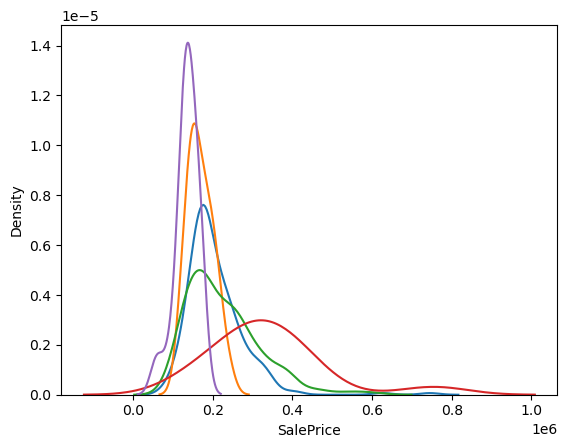

In [170]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()